In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import os
print(os.listdir("/content/drive/MyDrive/Strokefaces"))

['Trainingset', 'Testingset', 'Validationset']


In [ ]:
import time
import pandas as pd
import os, shutil, math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from PIL import Image
from PIL import ImageDraw
from glob import glob

from IPython.display import SVG
from tensorflow.keras.utils import plot_model


from tensorflow.keras.applications import VGG19, Xception, NASNetMobile
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Flatten, Dropout, Concatenate, GlobalAveragePooling2D,
    BatchNormalization, Activation
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import (
    EarlyStopping, TensorBoard, CSVLogger,
    ReduceLROnPlateau, ModelCheckpoint
)


import cv2
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score




In [ ]:
train_data_dir = '/content/drive/MyDrive/Strokefaces/Trainingset'
img_width, img_height = 299, 299
batch_size = 32
validation_dir = '/content/drive/MyDrive/Strokefaces/Validationset'

In [ ]:
image_datagen = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=20,
    shear_range=0.05,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)


train_gen = image_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="categorical",
        subset="training")

valid_gen = image_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="categorical",
        subset="validation")


Found 89 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=20,
    shear_range=0.05,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)


valid_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="categorical")

valid_gen = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="categorical")


Found 111 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


In [ ]:

second_dense_512 = [0, 1]
dropout = [0, 1]

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
print('Loaded model!')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Loaded model!


In [ ]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

for dense2 in second_dense_512:
    for drop in dropout:

        NAME = "strokefaces-inception-dense{}-drop{}-{}".format(dense2, drop, int(time.time()))
        print(NAME)
        logdir = "logs/strokefaces-inception/{}/".format(NAME)

        # Callbacks
        checkpoint = ModelCheckpoint(
            '{}base.weights.h5'.format(logdir),  # Changed to ".weights.h5"
            monitor='val_loss',
            mode='min',
            save_weights_only=True,
            save_best_only=True,
            verbose=1
        )

        tensorboard = TensorBoard(
            log_dir=logdir,
            histogram_freq=0,
            write_graph=True,
            write_images=False,
        )

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024)(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        if drop == 1 : x = Dropout(0.3)(x)
        if dense2 == 1 :
            x = Dense(512)(x)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            if drop == 1 : x = Dropout(0.3)(x)

        predictions = Dense(2, activation='softmax')(x)

        model = Model(base_model.input, predictions)


        model.compile(loss='categorical_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])

strokefaces-inception-dense0-drop0-1740992710
strokefaces-inception-dense0-drop1-1740992711
strokefaces-inception-dense1-drop0-1740992711
strokefaces-inception-dense1-drop1-1740992711


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

for dense2 in second_dense_512:
    for drop in dropout:

        NAME = "strokefaces-inception-dense{}-drop{}-{}".format(dense2, drop, int(time.time()))
        print(NAME)
        logdir = "logs/strokefaces-inception/{}/".format(NAME)

        # Callbacks
        checkpoint = ModelCheckpoint(
            '{}base.weights.h5'.format(logdir),  # Corrected filepath
            monitor='val_loss',
            mode='min',
            save_weights_only=True,
            save_best_only=False,
            verbose=1
        )
        tensorboard = TensorBoard(
            log_dir=logdir,
            histogram_freq=0,  # Frequency of histogram computation
            write_graph=True,
            write_images=False,  # Removed batch_size
        )

        # Build model
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024)(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        if drop == 1: x = Dropout(0.3)(x)
        if dense2 == 1:
            x = Dense(512)(x)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            if drop == 1: x = Dropout(0.3)(x)

        predictions = Dense(2, activation='softmax')(x)

        model = Model(base_model.input, predictions)

        # Compile the model
        model.compile(
            loss='categorical_crossentropy',
            optimizer='Adam',
            metrics=['accuracy']
        )


strokefaces-inception-dense0-drop0-1740992715
strokefaces-inception-dense0-drop1-1740992715
strokefaces-inception-dense1-drop0-1740992715
strokefaces-inception-dense1-drop1-1740992715


In [ ]:
history = model.fit(
            train_gen,
            steps_per_epoch = train_gen.n // train_gen.batch_size,
            epochs= 3,
            validation_data = valid_gen,
            validation_steps=valid_gen.n // valid_gen.batch_size,
            verbose=1,

            callbacks=[checkpoint])
model.save("stroke_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5156 - loss: 0.9611
Epoch 1: saving model to logs/strokefaces-inception/strokefaces-inception-dense1-drop1-1740992715/base.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 194s 87s/step - accuracy: 0.5352 - loss: 0.9617 - val_accuracy: 0.9948 - val_loss: 0.3853
Epoch 2/3
1/3 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.7333 - loss: 0.5189

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to logs/strokefaces-inception/strokefaces-inception-dense1-drop1-1740992715/base.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 89s 42s/step - accuracy: 0.7333 - loss: 0.5189 - val_accuracy: 0.8802 - val_loss: 0.5093
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7517 - loss: 0.4892 
Epoch 3: saving model to logs/strokefaces-inception/strokefaces-inception-dense1-drop1-1740992715/base.weights.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 142s 41s/step - accuracy: 0.7643 - loss: 0.4713 - val_accuracy: 0.7656 - val_loss: 0.5743


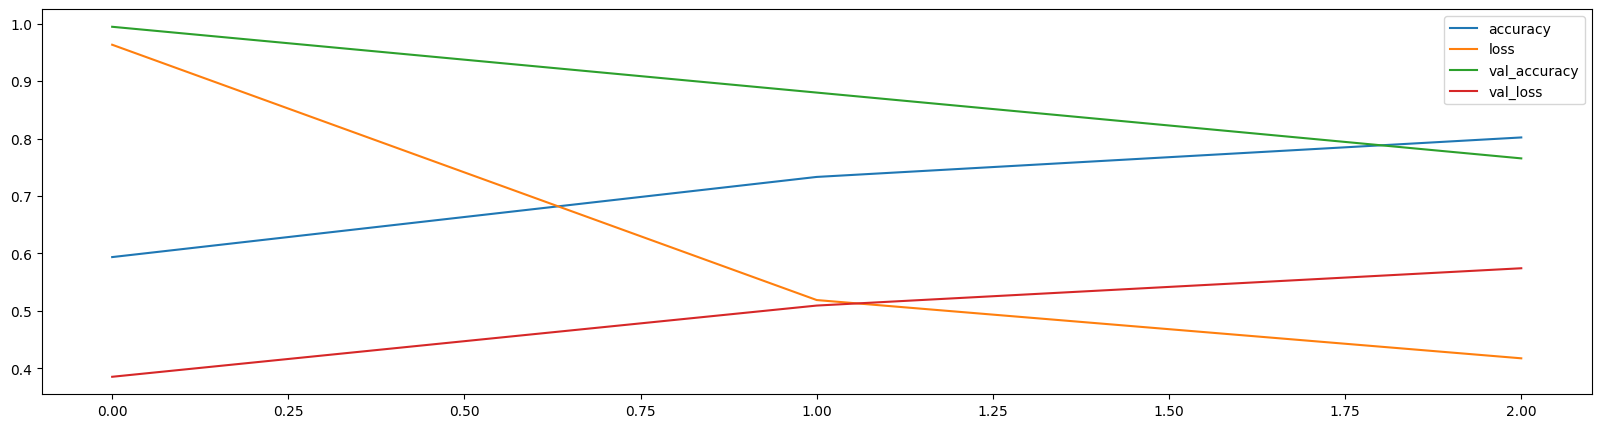

In [ ]:
pd.DataFrame(history.history).plot(figsize=(20,5))
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("stroke_model.h5")


In [ ]:
import os
model_path = os.path.abspath("stroke_model.h5")
print("Model saved at:", model_path)

Model saved at: /content/stroke_model.h5


In [ ]:
from tensorflow.keras.models import load_model

model_path = "/content/stroke_model.h5"
model = load_model(model_path)

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam


model_path = "/content/stroke_model.h5"
model = load_model(model_path)


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

print("Model recompiled successfully!")


Model recompiled successfully!


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

model_path = "/content/stroke_model.h5"
model = load_model(model_path)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model loaded and compiled successfully!")

img_width, img_height = 299, 299


Model loaded and compiled successfully!


In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_width, img_height))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img


In [ ]:
def predict_stroke(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_labels = ["No, the person is healthy", "Yes, the person has stroke"]

    print(f"Prediction: {class_labels[class_idx]}")
    return class_labels[class_idx]


In [ ]:
image_path = "/content/jisoo.jpeg"
result = predict_stroke(image_path)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: No, the person is healthy
No, the person is healthy
